<a href="https://colab.research.google.com/github/giuliabet/multi-label-classification/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LIBRARIES
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
from PIL import Image
import os
import time
from collections import defaultdict
import warnings
import zipfile
import requests
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [ ]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

Device: cpu


In [ ]:
# GLOBAL CONFIGURATIONS
# Configuration parameters for training image-based models
BATCH_SIZE = 64
NUM_EPOCHS = 15
IMAGE_SIZE = 64
NUM_WORKERS = 4

# Complete list of CelebA attributes (40 attributes)
CELEBA_ATTRIBUTES = [
    '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
    'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
    'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
    'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
    'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
    'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks',
    'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
    'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'
]

# Hair color attributes
SELECTED_ATTRIBUTES = ['Black_Hair', 'Blond_Hair', 'Brown_Hair']
NUM_ATTRIBUTES = len(SELECTED_ATTRIBUTES)

# DATASET
# Dataset download
def download_celeba_dataset(data_dir='./data'):
    print("Download del Dataset CelebA")

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    celeba_dir = os.path.join(data_dir, 'celeba')
    if not os.path.exists(celeba_dir):
        os.makedirs(celeba_dir)

    # Necessary files
    files_to_download = {
        'img_align_celeba.zip': 'https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM',
        'list_attr_celeba.txt': 'https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U',
        'list_eval_partition.txt': 'https://drive.google.com/uc?id=0B7EVK8r0v71pY0NSMzRuSXJEVkk'
    }

    # Check
    img_dir = os.path.join(celeba_dir, 'img_align_celeba')
    attr_file = os.path.join(celeba_dir, 'list_attr_celeba.txt')
    partition_file = os.path.join(celeba_dir, 'list_eval_partition.txt')

    if os.path.exists(img_dir) and os.path.exists(attr_file) and os.path.exists(partition_file):
        print("Dataset CelebA already present")
        return celeba_dir


    print("\nTorchvision.datasets.CelebA")

    return celeba_dir

All dependencies are available.
PyTorch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124
CELEBA DEEP LEARNING MODELS COMPARISON
Device: cpu
Batch size: 64
Epochs: 15
Selected attributes: ['Black_Hair', 'Blond_Hair', 'Brown_Hair']

1. Setup Dataset CelebA...
Dataset creation
Setup dataset CelebA with torchvision
Download - torchvision
Training set


Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pd0FJY3Blby1HUTQ
To: /content/data/celeba/list_landmarks_align_celeba.txt
100%|██████████| 12.2M/12.2M [00:00<00:00, 80.8MB/s]


Test set
Training samples: 162770
Test samples: 19962
Training samples: 10000
Test samples: 2000
Dataset cloades
Selected attributes: ['Black_Hair', 'Blond_Hair', 'Brown_Hair']

2. Training and evaluation of 6 models

[1/6] Processing: Simple CNN (LR=0.001, Dropout=0.5)

Training Simple CNN (LR=0.001, Dropout=0.5)


Epoch 1/15: 100%|██████████| 157/157 [01:22<00:00,  1.91it/s, Loss=0.3708]


Epoch [1/15], Average Loss: 0.4177


Epoch 2/15: 100%|██████████| 157/157 [01:24<00:00,  1.85it/s, Loss=0.2985]


Epoch [2/15], Average Loss: 0.3379


Epoch 3/15: 100%|██████████| 157/157 [01:23<00:00,  1.88it/s, Loss=0.3002]


Epoch [3/15], Average Loss: 0.3005


Epoch 4/15: 100%|██████████| 157/157 [01:22<00:00,  1.90it/s, Loss=0.2787]


Epoch [4/15], Average Loss: 0.2869


Epoch 5/15: 100%|██████████| 157/157 [01:23<00:00,  1.89it/s, Loss=0.1681]


Epoch [5/15], Average Loss: 0.2705


Epoch 6/15: 100%|██████████| 157/157 [01:30<00:00,  1.74it/s, Loss=0.1996]


Epoch [6/15], Average Loss: 0.2641


Epoch 7/15: 100%|██████████| 157/157 [01:28<00:00,  1.77it/s, Loss=0.2767]


Epoch [7/15], Average Loss: 0.2568


Epoch 8/15: 100%|██████████| 157/157 [01:26<00:00,  1.82it/s, Loss=0.4731]


Epoch [8/15], Average Loss: 0.2527


Epoch 9/15: 100%|██████████| 157/157 [01:26<00:00,  1.81it/s, Loss=0.2551]


Epoch [9/15], Average Loss: 0.2462


Epoch 10/15: 100%|██████████| 157/157 [01:28<00:00,  1.77it/s, Loss=0.2434]


Epoch [10/15], Average Loss: 0.2429


Epoch 11/15: 100%|██████████| 157/157 [01:26<00:00,  1.82it/s, Loss=0.2031]


Epoch [11/15], Average Loss: 0.2380


Epoch 12/15: 100%|██████████| 157/157 [01:27<00:00,  1.80it/s, Loss=0.1624]


Epoch [12/15], Average Loss: 0.2339


Epoch 13/15: 100%|██████████| 157/157 [01:31<00:00,  1.71it/s, Loss=0.1056]


Epoch [13/15], Average Loss: 0.2289


Epoch 14/15: 100%|██████████| 157/157 [01:28<00:00,  1.76it/s, Loss=0.2385]


Epoch [14/15], Average Loss: 0.2250


Epoch 15/15: 100%|██████████| 157/157 [01:25<00:00,  1.84it/s, Loss=0.3086]


Epoch [15/15], Average Loss: 0.2247

 Evaluating Simple CNN (LR=0.001, Dropout=0.5)


Evaluation: 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]


Black_Hair: Acc=0.848, P=0.709, R=0.841, F1=0.769
Blond_Hair: Acc=0.947, P=0.802, R=0.746, F1=0.773
Brown_Hair: Acc=0.870, P=0.710, R=0.516, F1=0.598

3. Visualization for Simple CNN (LR=0.001, Dropout=0.5)...


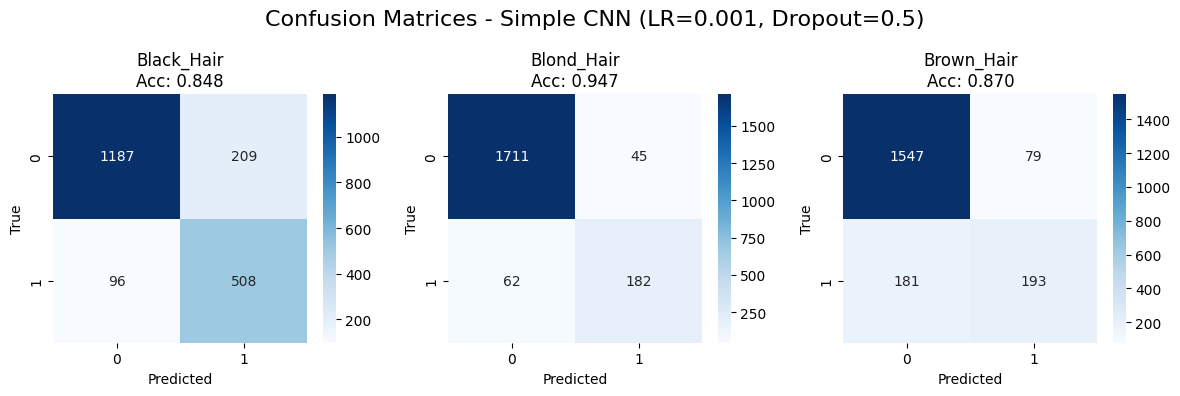

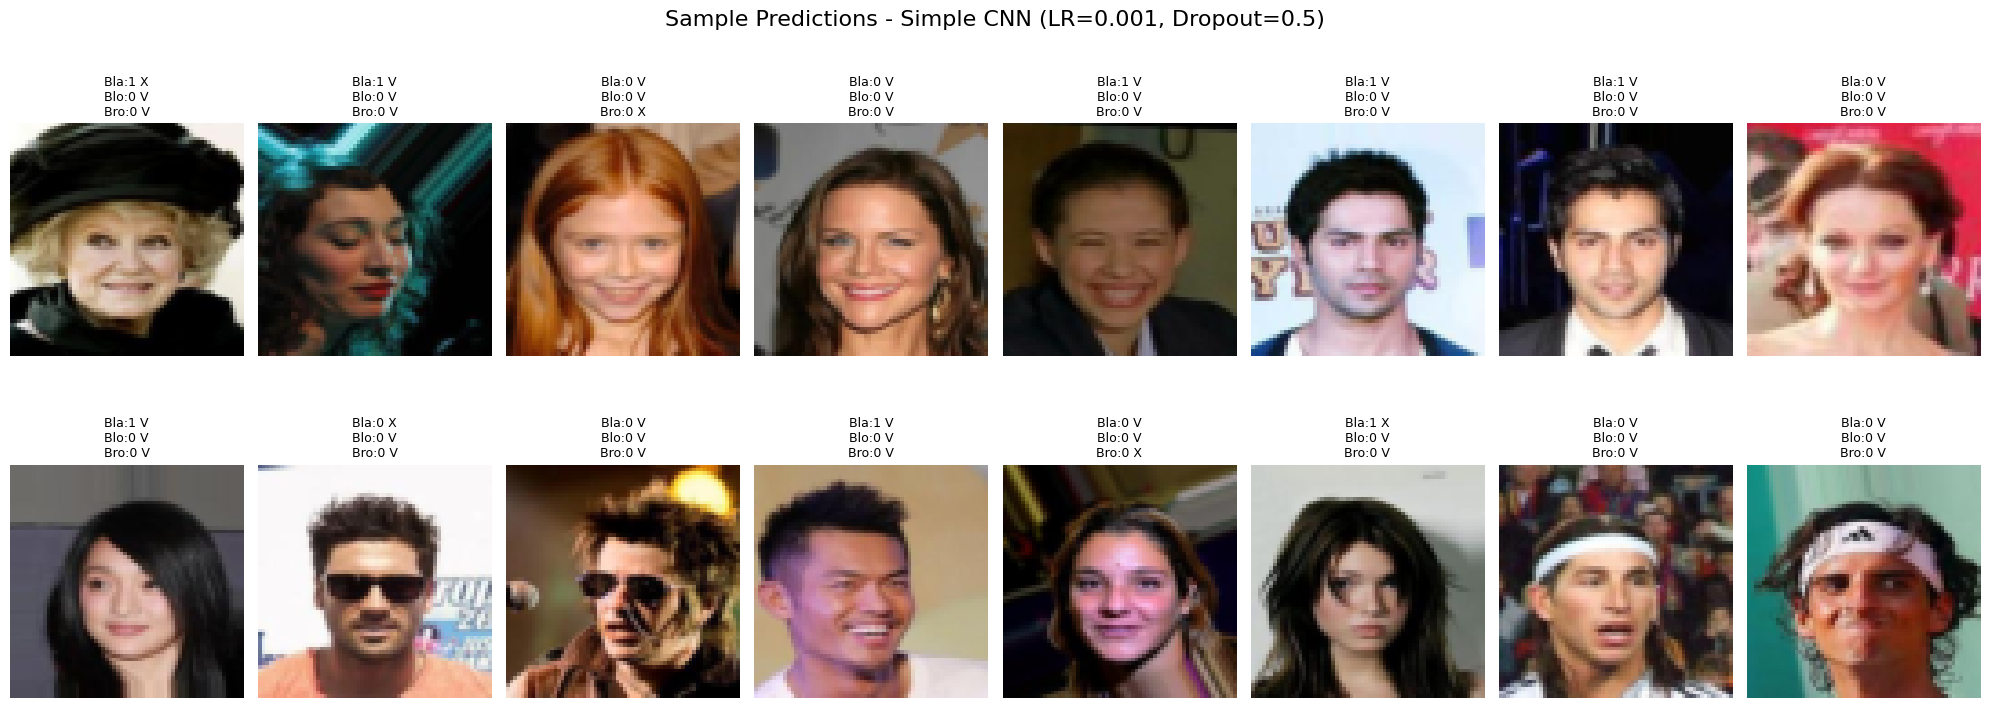


[2/6] Processing: Simple CNN (LR=0.0001, Dropout=0.3)

Training Simple CNN (LR=0.0001, Dropout=0.3)


Epoch 1/15: 100%|██████████| 157/157 [01:28<00:00,  1.78it/s, Loss=0.3554]


Epoch [1/15], Average Loss: 0.4658


Epoch 2/15: 100%|██████████| 157/157 [01:29<00:00,  1.76it/s, Loss=0.3589]


Epoch [2/15], Average Loss: 0.3765


Epoch 3/15: 100%|██████████| 157/157 [01:27<00:00,  1.79it/s, Loss=0.5478]


Epoch [3/15], Average Loss: 0.3478


Epoch 4/15: 100%|██████████| 157/157 [01:30<00:00,  1.73it/s, Loss=0.3446]


Epoch [4/15], Average Loss: 0.3307


Epoch 5/15: 100%|██████████| 157/157 [01:32<00:00,  1.71it/s, Loss=0.3071]


Epoch [5/15], Average Loss: 0.3155


Epoch 6/15: 100%|██████████| 157/157 [01:29<00:00,  1.75it/s, Loss=0.4067]


Epoch [6/15], Average Loss: 0.3032


Epoch 7/15: 100%|██████████| 157/157 [01:28<00:00,  1.77it/s, Loss=0.2730]


Epoch [7/15], Average Loss: 0.2980


Epoch 8/15: 100%|██████████| 157/157 [01:27<00:00,  1.79it/s, Loss=0.4399]


Epoch [8/15], Average Loss: 0.2906


Epoch 9/15: 100%|██████████| 157/157 [01:28<00:00,  1.77it/s, Loss=0.3720]


Epoch [9/15], Average Loss: 0.2825


Epoch 10/15: 100%|██████████| 157/157 [01:30<00:00,  1.74it/s, Loss=0.1705]


Epoch [10/15], Average Loss: 0.2759


Epoch 11/15: 100%|██████████| 157/157 [01:32<00:00,  1.69it/s, Loss=0.2035]


Epoch [11/15], Average Loss: 0.2734


Epoch 12/15: 100%|██████████| 157/157 [01:30<00:00,  1.74it/s, Loss=0.2577]


Epoch [12/15], Average Loss: 0.2710


Epoch 13/15: 100%|██████████| 157/157 [01:31<00:00,  1.71it/s, Loss=0.3107]


Epoch [13/15], Average Loss: 0.2661


Epoch 14/15: 100%|██████████| 157/157 [01:29<00:00,  1.76it/s, Loss=0.2404]


Epoch [14/15], Average Loss: 0.2630


Epoch 15/15: 100%|██████████| 157/157 [01:29<00:00,  1.76it/s, Loss=0.2650]


Epoch [15/15], Average Loss: 0.2601

 Evaluating Simple CNN (LR=0.0001, Dropout=0.3)


Evaluation: 100%|██████████| 32/32 [00:08<00:00,  3.83it/s]


Black_Hair: Acc=0.845, P=0.808, R=0.636, F1=0.712
Blond_Hair: Acc=0.933, P=0.799, R=0.602, F1=0.687
Brown_Hair: Acc=0.870, P=0.650, R=0.660, F1=0.655

3. Visualization for Simple CNN (LR=0.0001, Dropout=0.3)...


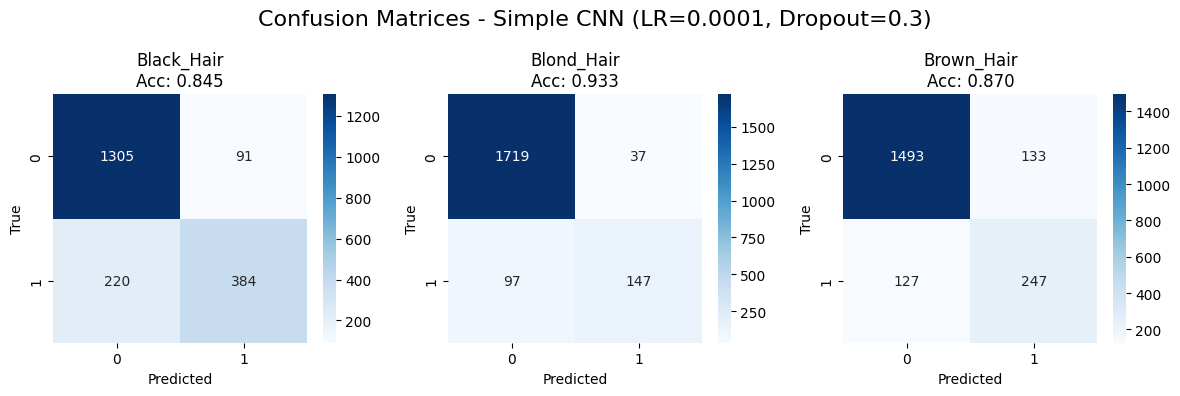

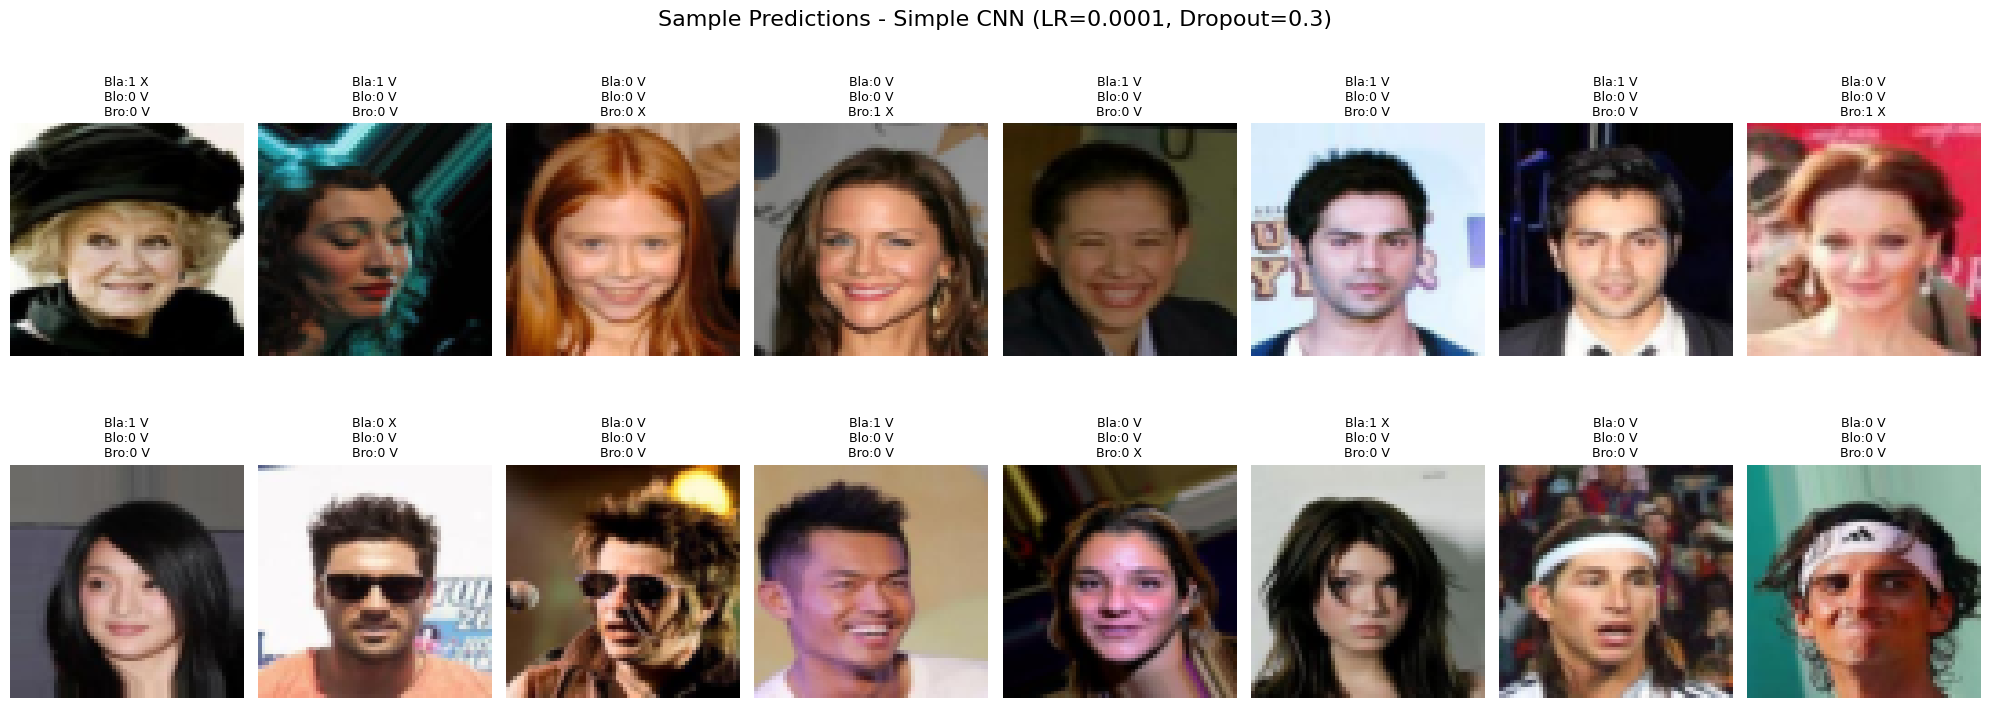


[3/6] Processing: Deep CNN (LR=0.001, Dropout=0.5)

Training Deep CNN (LR=0.001, Dropout=0.5)


Epoch 1/15: 100%|██████████| 157/157 [14:52<00:00,  5.69s/it, Loss=0.4358]


Epoch [1/15], Average Loss: 0.4423


Epoch 2/15: 100%|██████████| 157/157 [14:48<00:00,  5.66s/it, Loss=0.2826]


Epoch [2/15], Average Loss: 0.3642


Epoch 3/15: 100%|██████████| 157/157 [15:19<00:00,  5.86s/it, Loss=0.2704]


Epoch [3/15], Average Loss: 0.3417


Epoch 4/15: 100%|██████████| 157/157 [15:06<00:00,  5.77s/it, Loss=0.2857]


Epoch [4/15], Average Loss: 0.3302


Epoch 5/15: 100%|██████████| 157/157 [15:18<00:00,  5.85s/it, Loss=0.4117]


Epoch [5/15], Average Loss: 0.3117


Epoch 6/15: 100%|██████████| 157/157 [15:18<00:00,  5.85s/it, Loss=0.2788]


Epoch [6/15], Average Loss: 0.3105


Epoch 7/15: 100%|██████████| 157/157 [15:21<00:00,  5.87s/it, Loss=0.3864]


Epoch [7/15], Average Loss: 0.3051


Epoch 8/15: 100%|██████████| 157/157 [15:24<00:00,  5.89s/it, Loss=0.2726]


Epoch [8/15], Average Loss: 0.2910


Epoch 9/15: 100%|██████████| 157/157 [15:30<00:00,  5.93s/it, Loss=0.2756]


Epoch [9/15], Average Loss: 0.2869


Epoch 10/15: 100%|██████████| 157/157 [15:28<00:00,  5.91s/it, Loss=0.1836]


Epoch [10/15], Average Loss: 0.2773


Epoch 11/15: 100%|██████████| 157/157 [15:04<00:00,  5.76s/it, Loss=0.2410]


Epoch [11/15], Average Loss: 0.2816


Epoch 12/15: 100%|██████████| 157/157 [14:55<00:00,  5.70s/it, Loss=0.2995]


Epoch [12/15], Average Loss: 0.2765


Epoch 13/15: 100%|██████████| 157/157 [15:04<00:00,  5.76s/it, Loss=0.2178]


Epoch [13/15], Average Loss: 0.2736


Epoch 14/15: 100%|██████████| 157/157 [15:07<00:00,  5.78s/it, Loss=0.2263]


Epoch [14/15], Average Loss: 0.2762


Epoch 15/15: 100%|██████████| 157/157 [15:00<00:00,  5.73s/it, Loss=0.2913]


Epoch [15/15], Average Loss: 0.2709

 Evaluating Deep CNN (LR=0.001, Dropout=0.5)


Evaluation: 100%|██████████| 32/32 [01:00<00:00,  1.89s/it]


Black_Hair: Acc=0.828, P=0.683, R=0.801, F1=0.737
Blond_Hair: Acc=0.924, P=0.631, R=0.910, F1=0.745
Brown_Hair: Acc=0.830, P=0.905, R=0.102, F1=0.183

3. Visualization for Deep CNN (LR=0.001, Dropout=0.5)...


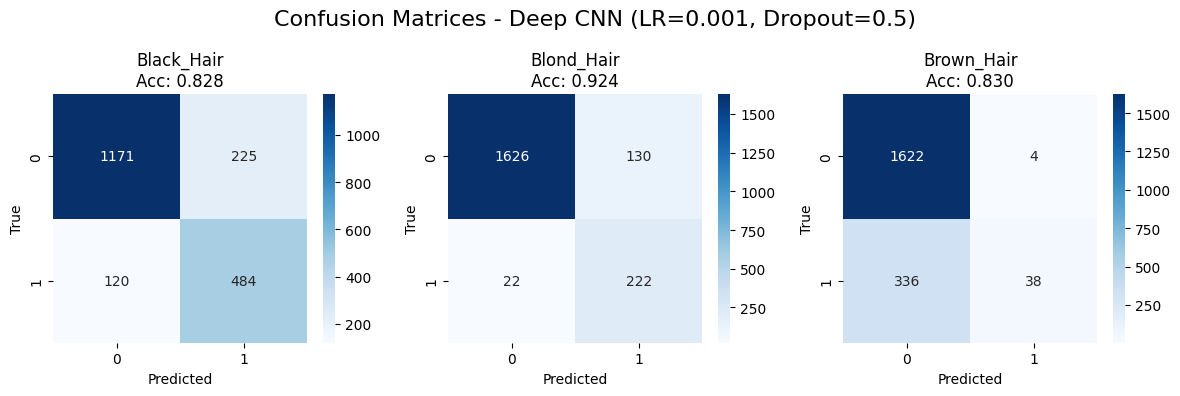

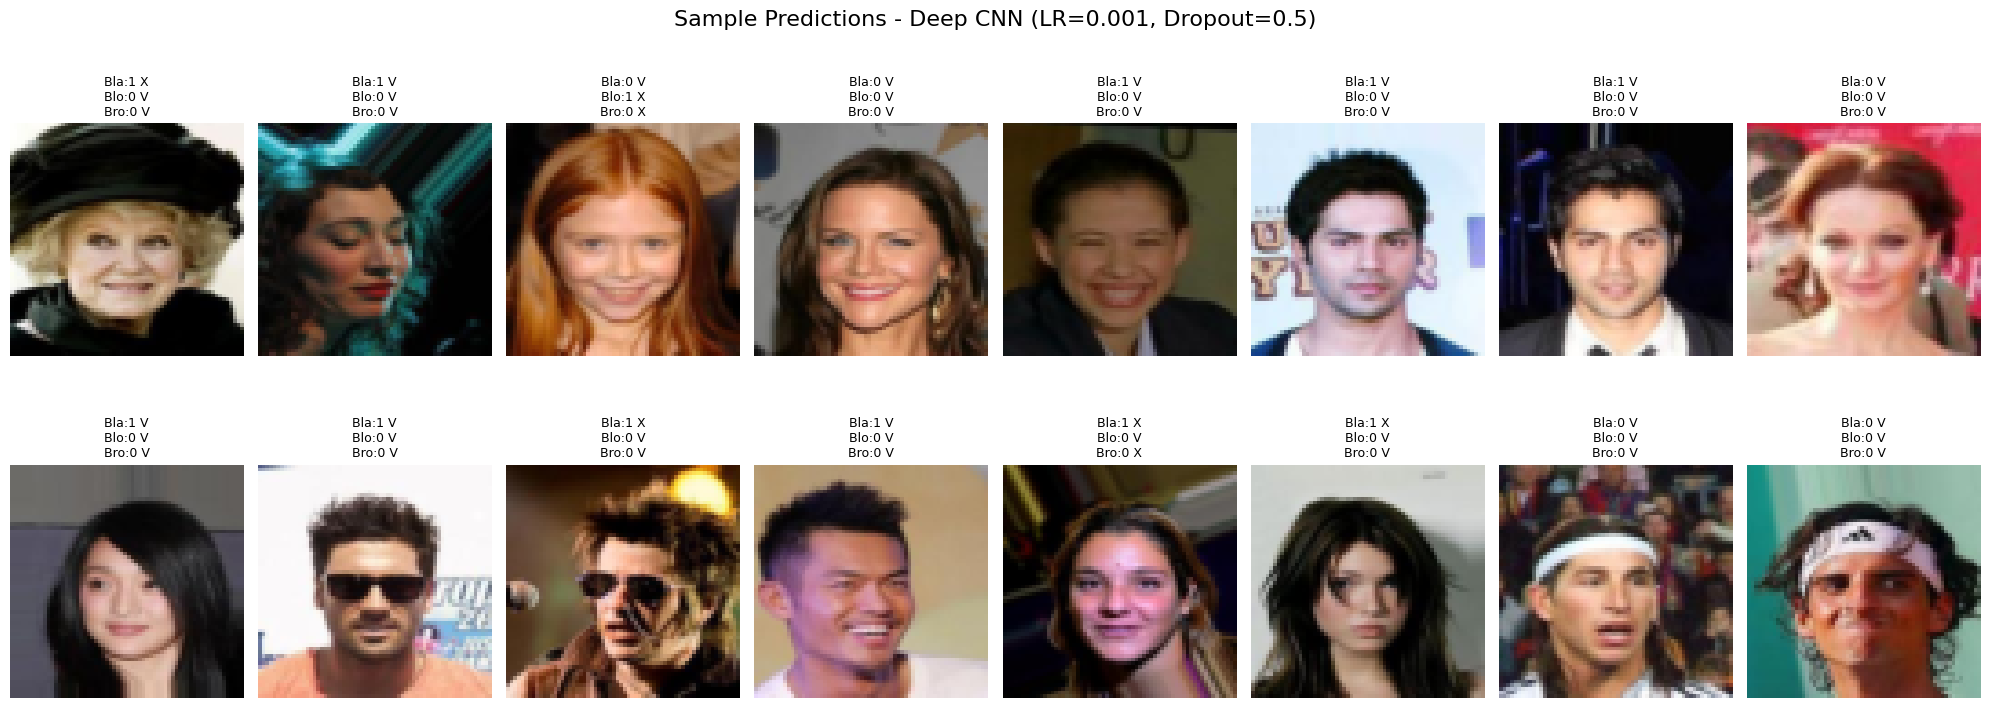


[4/6] Processing: ResNet (LR=0.001, Dropout=0.5)

Training ResNet (LR=0.001, Dropout=0.5)


Epoch 1/15: 100%|██████████| 157/157 [03:16<00:00,  1.25s/it, Loss=0.1776]


Epoch [1/15], Average Loss: 0.3530


Epoch 2/15: 100%|██████████| 157/157 [03:17<00:00,  1.26s/it, Loss=0.2705]


Epoch [2/15], Average Loss: 0.2971


Epoch 3/15: 100%|██████████| 157/157 [03:17<00:00,  1.26s/it, Loss=0.3260]


Epoch [3/15], Average Loss: 0.2794


Epoch 4/15: 100%|██████████| 157/157 [03:19<00:00,  1.27s/it, Loss=0.1974]


Epoch [4/15], Average Loss: 0.2659


Epoch 5/15: 100%|██████████| 157/157 [03:13<00:00,  1.24s/it, Loss=0.3369]


Epoch [5/15], Average Loss: 0.2606


Epoch 6/15: 100%|██████████| 157/157 [03:11<00:00,  1.22s/it, Loss=0.2083]


Epoch [6/15], Average Loss: 0.2508


Epoch 7/15: 100%|██████████| 157/157 [03:16<00:00,  1.25s/it, Loss=0.1709]


Epoch [7/15], Average Loss: 0.2533


Epoch 8/15: 100%|██████████| 157/157 [03:14<00:00,  1.24s/it, Loss=0.2362]


Epoch [8/15], Average Loss: 0.2463


Epoch 9/15: 100%|██████████| 157/157 [03:15<00:00,  1.25s/it, Loss=0.1649]


Epoch [9/15], Average Loss: 0.2388


Epoch 10/15: 100%|██████████| 157/157 [03:23<00:00,  1.30s/it, Loss=0.2975]


Epoch [10/15], Average Loss: 0.2336


Epoch 11/15: 100%|██████████| 157/157 [03:19<00:00,  1.27s/it, Loss=0.2354]


Epoch [11/15], Average Loss: 0.2307


Epoch 12/15: 100%|██████████| 157/157 [03:16<00:00,  1.25s/it, Loss=0.4700]


Epoch [12/15], Average Loss: 0.2328


Epoch 13/15: 100%|██████████| 157/157 [03:17<00:00,  1.26s/it, Loss=0.1611]


Epoch [13/15], Average Loss: 0.2214


Epoch 14/15: 100%|██████████| 157/157 [03:10<00:00,  1.22s/it, Loss=0.2174]


Epoch [14/15], Average Loss: 0.2180


Epoch 15/15: 100%|██████████| 157/157 [03:09<00:00,  1.21s/it, Loss=0.1143]


Epoch [15/15], Average Loss: 0.2121

 Evaluating ResNet (LR=0.001, Dropout=0.5)


Evaluation: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]


Black_Hair: Acc=0.840, P=0.725, R=0.758, F1=0.741
Blond_Hair: Acc=0.948, P=0.836, R=0.709, F1=0.767
Brown_Hair: Acc=0.853, P=0.774, R=0.302, F1=0.435

3. Visualization for ResNet (LR=0.001, Dropout=0.5)...


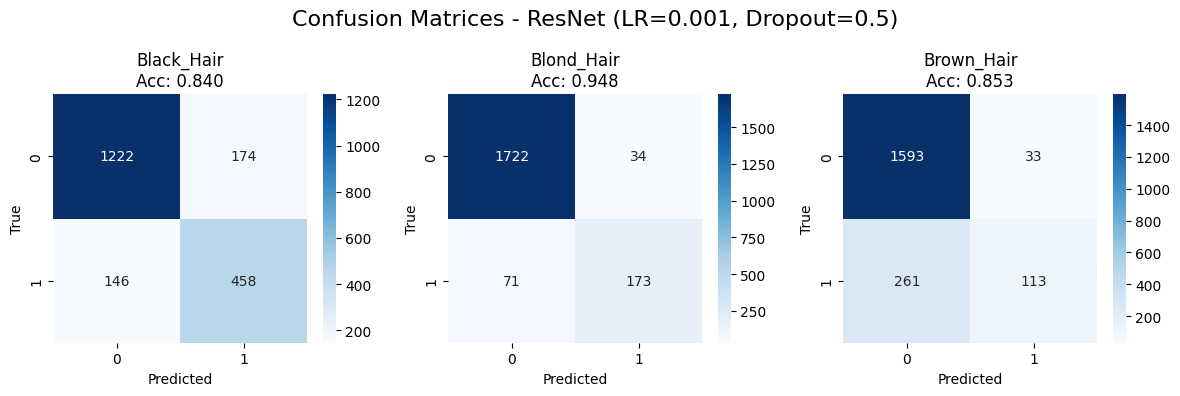

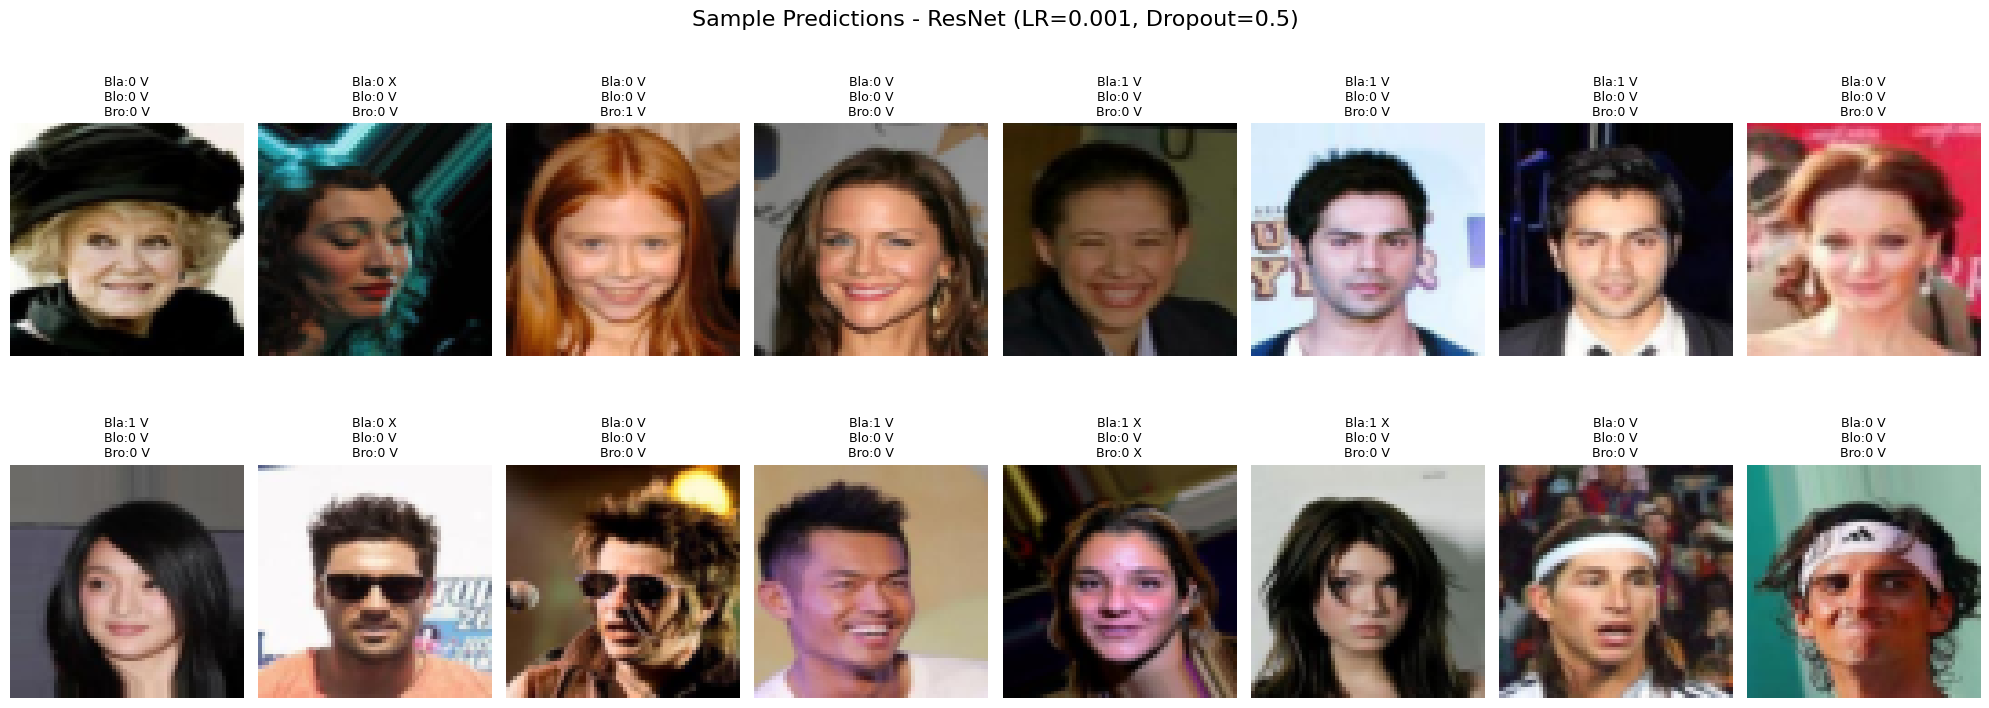


[5/6] Processing: ResNet (LR=0.0001, Dropout=0.3)

Training ResNet (LR=0.0001, Dropout=0.3)


Epoch 1/15: 100%|██████████| 157/157 [03:10<00:00,  1.21s/it, Loss=0.4564]


Epoch [1/15], Average Loss: 0.3507


Epoch 2/15: 100%|██████████| 157/157 [03:19<00:00,  1.27s/it, Loss=0.2282]


Epoch [2/15], Average Loss: 0.2737


Epoch 3/15: 100%|██████████| 157/157 [03:21<00:00,  1.28s/it, Loss=0.2624]


Epoch [3/15], Average Loss: 0.2452


Epoch 4/15: 100%|██████████| 157/157 [03:25<00:00,  1.31s/it, Loss=0.2326]


Epoch [4/15], Average Loss: 0.2210


Epoch 5/15: 100%|██████████| 157/157 [03:23<00:00,  1.30s/it, Loss=0.2332]


Epoch [5/15], Average Loss: 0.1987


Epoch 6/15: 100%|██████████| 157/157 [03:25<00:00,  1.31s/it, Loss=0.2146]


Epoch [6/15], Average Loss: 0.1749


Epoch 7/15: 100%|██████████| 157/157 [03:24<00:00,  1.30s/it, Loss=0.1188]


Epoch [7/15], Average Loss: 0.1530


Epoch 8/15: 100%|██████████| 157/157 [03:25<00:00,  1.31s/it, Loss=0.4507]


Epoch [8/15], Average Loss: 0.1363


Epoch 9/15: 100%|██████████| 157/157 [03:23<00:00,  1.30s/it, Loss=0.1075]


Epoch [9/15], Average Loss: 0.1211


Epoch 10/15: 100%|██████████| 157/157 [03:25<00:00,  1.31s/it, Loss=0.0936]


Epoch [10/15], Average Loss: 0.1053


Epoch 11/15: 100%|██████████| 157/157 [03:19<00:00,  1.27s/it, Loss=0.1469]


Epoch [11/15], Average Loss: 0.0930


Epoch 12/15: 100%|██████████| 157/157 [03:19<00:00,  1.27s/it, Loss=0.0456]


Epoch [12/15], Average Loss: 0.0788


Epoch 13/15: 100%|██████████| 157/157 [03:26<00:00,  1.32s/it, Loss=0.2267]


Epoch [13/15], Average Loss: 0.0702


Epoch 14/15: 100%|██████████| 157/157 [03:34<00:00,  1.37s/it, Loss=0.0507]


Epoch [14/15], Average Loss: 0.0642


Epoch 15/15: 100%|██████████| 157/157 [03:31<00:00,  1.34s/it, Loss=0.1649]


Epoch [15/15], Average Loss: 0.0564

 Evaluating ResNet (LR=0.0001, Dropout=0.3)


Evaluation: 100%|██████████| 32/32 [00:13<00:00,  2.41it/s]


Black_Hair: Acc=0.832, P=0.815, R=0.575, F1=0.674
Blond_Hair: Acc=0.932, P=0.776, R=0.623, F1=0.691
Brown_Hair: Acc=0.826, P=0.533, R=0.559, F1=0.546

3. Visualization for ResNet (LR=0.0001, Dropout=0.3)...


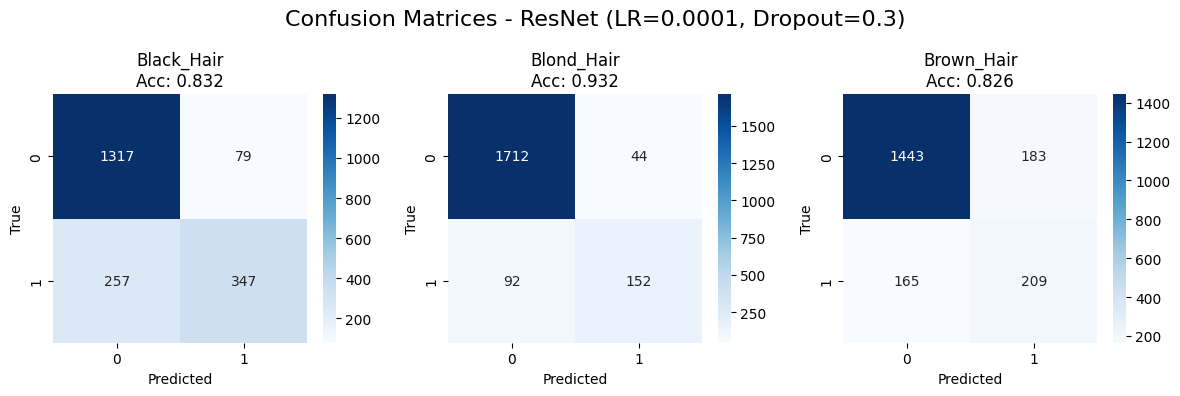

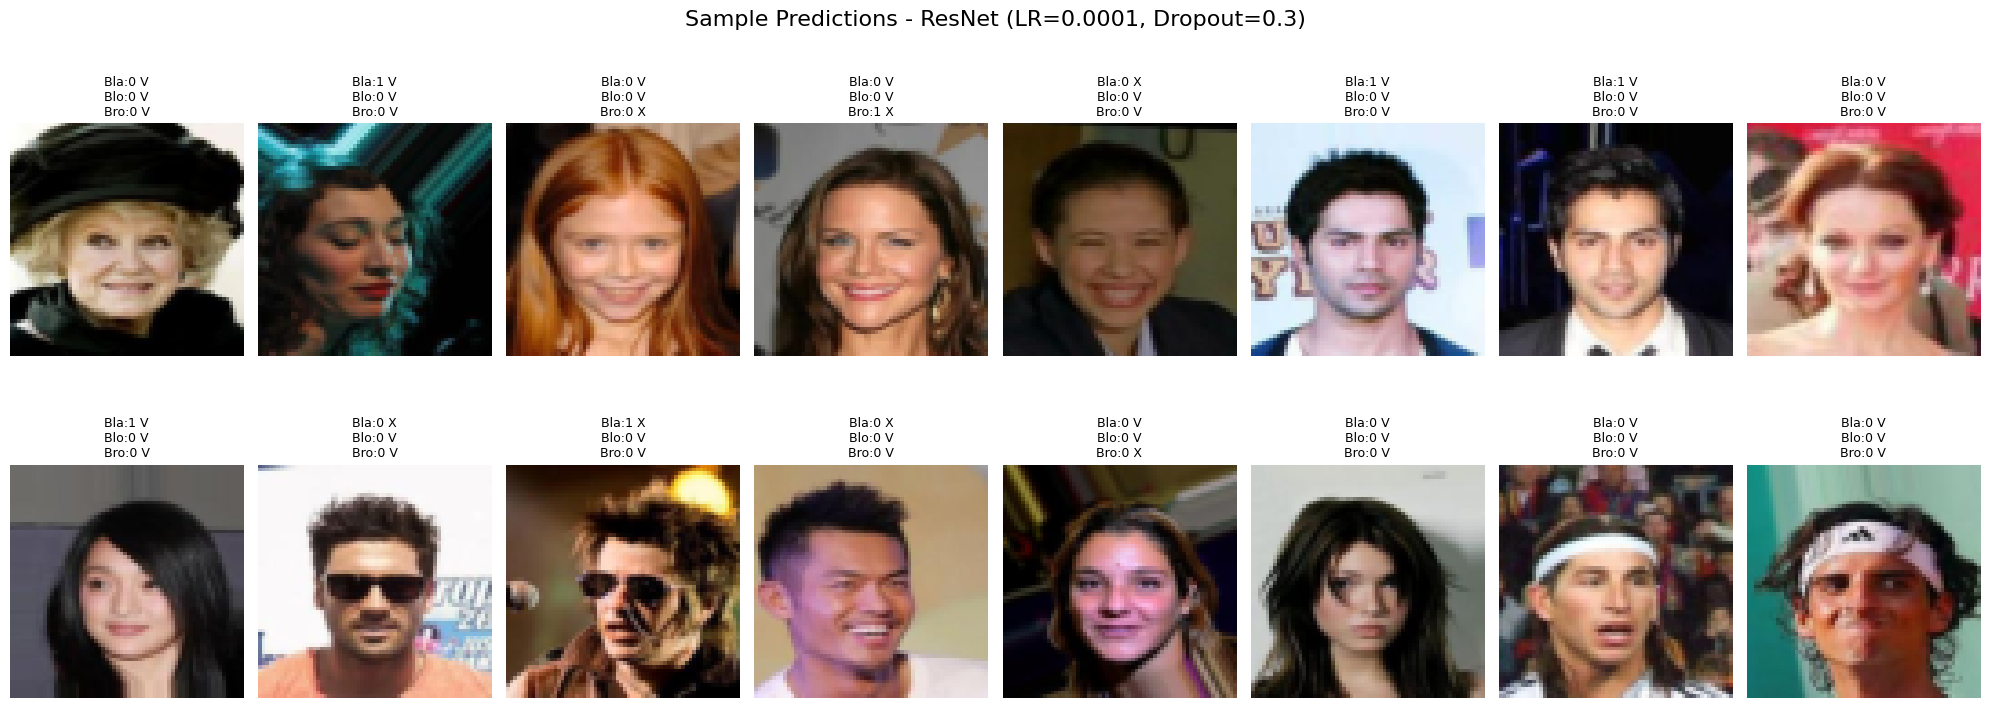


[6/6] Processing: Vision Transformer (LR=0.0001)

Training Vision Transformer (LR=0.0001)


Epoch 1/15: 100%|██████████| 157/157 [06:34<00:00,  2.51s/it, Loss=0.4337]


Epoch [1/15], Average Loss: 0.4490


Epoch 2/15: 100%|██████████| 157/157 [06:35<00:00,  2.52s/it, Loss=0.3979]


Epoch [2/15], Average Loss: 0.3703


Epoch 3/15: 100%|██████████| 157/157 [06:39<00:00,  2.54s/it, Loss=0.3697]


Epoch [3/15], Average Loss: 0.3503


Epoch 4/15: 100%|██████████| 157/157 [06:40<00:00,  2.55s/it, Loss=0.3401]


Epoch [4/15], Average Loss: 0.3368


Epoch 5/15: 100%|██████████| 157/157 [06:45<00:00,  2.59s/it, Loss=0.3818]


Epoch [5/15], Average Loss: 0.3285


Epoch 6/15: 100%|██████████| 157/157 [06:44<00:00,  2.58s/it, Loss=0.3087]


Epoch [6/15], Average Loss: 0.3306


Epoch 7/15: 100%|██████████| 157/157 [06:59<00:00,  2.67s/it, Loss=0.3795]


Epoch [7/15], Average Loss: 0.3129


Epoch 8/15: 100%|██████████| 157/157 [06:42<00:00,  2.56s/it, Loss=0.4700]


Epoch [8/15], Average Loss: 0.3086


Epoch 9/15: 100%|██████████| 157/157 [06:40<00:00,  2.55s/it, Loss=0.2794]


Epoch [9/15], Average Loss: 0.3060


Epoch 10/15: 100%|██████████| 157/157 [06:32<00:00,  2.50s/it, Loss=0.3110]


Epoch [10/15], Average Loss: 0.3011


Epoch 11/15: 100%|██████████| 157/157 [06:55<00:00,  2.65s/it, Loss=0.4000]


Epoch [11/15], Average Loss: 0.2981


Epoch 12/15: 100%|██████████| 157/157 [06:42<00:00,  2.57s/it, Loss=0.2954]


Epoch [12/15], Average Loss: 0.2936


Epoch 13/15: 100%|██████████| 157/157 [06:40<00:00,  2.55s/it, Loss=0.2331]


Epoch [13/15], Average Loss: 0.2903


Epoch 14/15: 100%|██████████| 157/157 [06:37<00:00,  2.53s/it, Loss=0.2714]


Epoch [14/15], Average Loss: 0.2880


Epoch 15/15: 100%|██████████| 157/157 [06:38<00:00,  2.54s/it, Loss=0.2649]


Epoch [15/15], Average Loss: 0.2805

 Evaluating Vision Transformer (LR=0.0001)


Evaluation: 100%|██████████| 32/32 [00:24<00:00,  1.33it/s]


Black_Hair: Acc=0.823, P=0.697, R=0.733, F1=0.715
Blond_Hair: Acc=0.941, P=0.762, R=0.746, F1=0.754
Brown_Hair: Acc=0.848, P=0.602, R=0.551, F1=0.575

3. Visualization for Vision Transformer (LR=0.0001)...


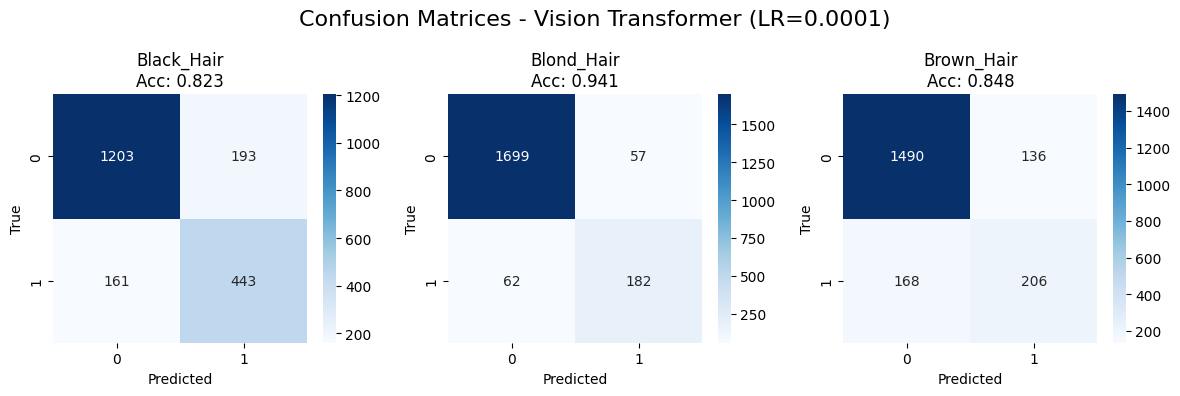

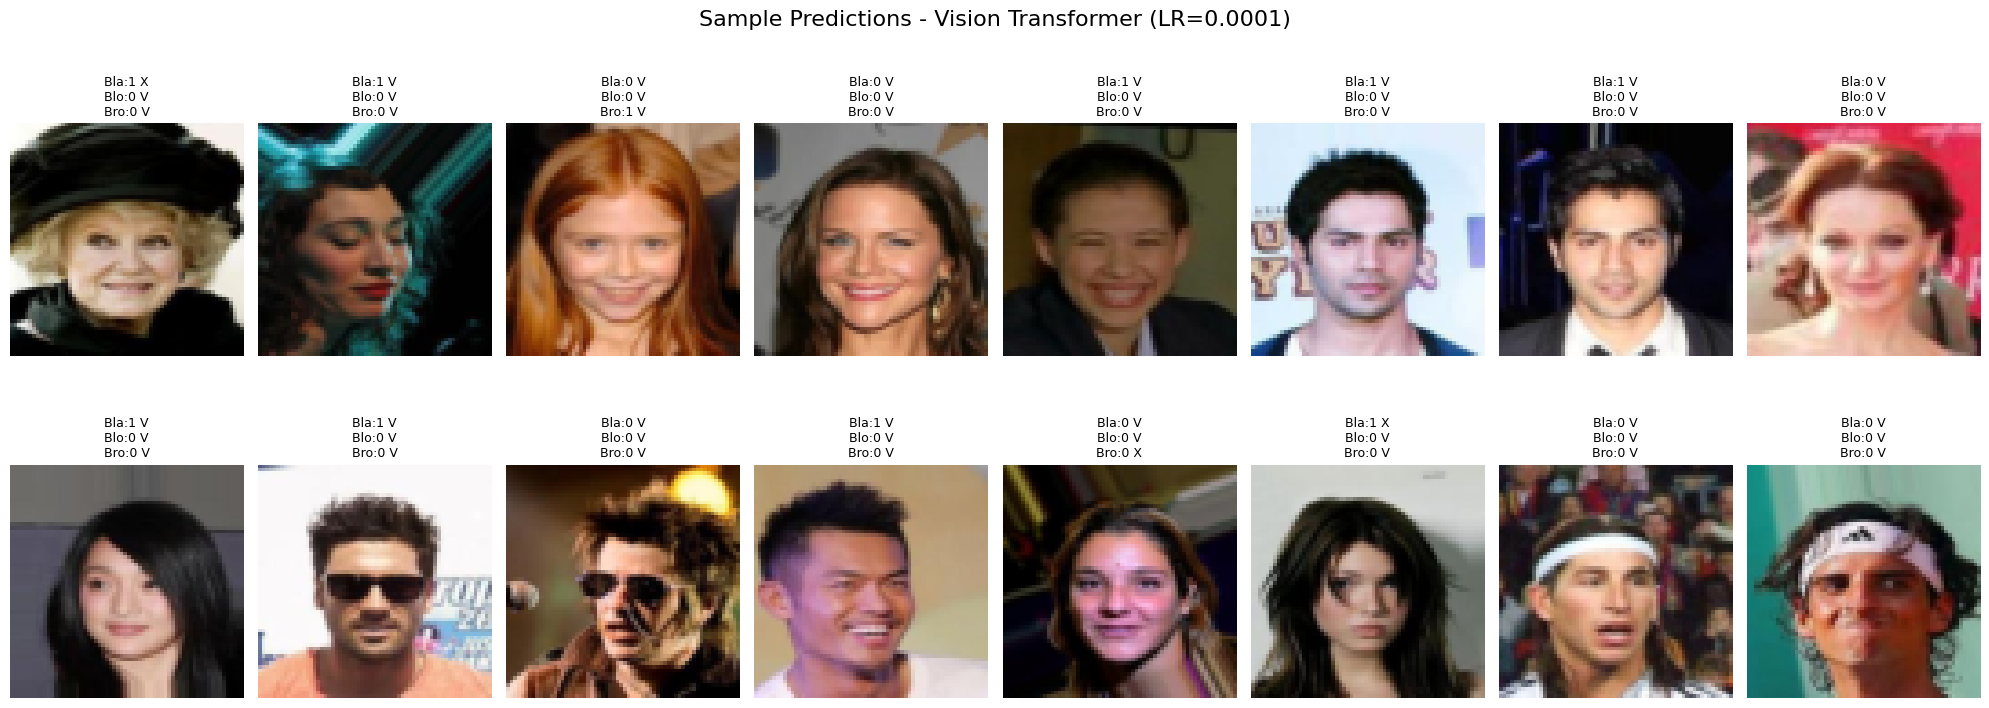


4. FINAL COMPARATIVE ANALYSIS

Summary:
                                  Model   Attribute  Accuracy  Precision  \
0    Simple CNN (LR=0.001, Dropout=0.5)  Black_Hair    0.8475     0.7085   
1    Simple CNN (LR=0.001, Dropout=0.5)  Blond_Hair    0.9465     0.8018   
2    Simple CNN (LR=0.001, Dropout=0.5)  Brown_Hair    0.8700     0.7096   
3   Simple CNN (LR=0.0001, Dropout=0.3)  Black_Hair    0.8445     0.8084   
4   Simple CNN (LR=0.0001, Dropout=0.3)  Blond_Hair    0.9330     0.7989   
5   Simple CNN (LR=0.0001, Dropout=0.3)  Brown_Hair    0.8700     0.6500   
6      Deep CNN (LR=0.001, Dropout=0.5)  Black_Hair    0.8275     0.6827   
7      Deep CNN (LR=0.001, Dropout=0.5)  Blond_Hair    0.9240     0.6307   
8      Deep CNN (LR=0.001, Dropout=0.5)  Brown_Hair    0.8300     0.9048   
9        ResNet (LR=0.001, Dropout=0.5)  Black_Hair    0.8400     0.7247   
10       ResNet (LR=0.001, Dropout=0.5)  Blond_Hair    0.9475     0.8357   
11       ResNet (LR=0.001, Dropout=0.5)  Brown_

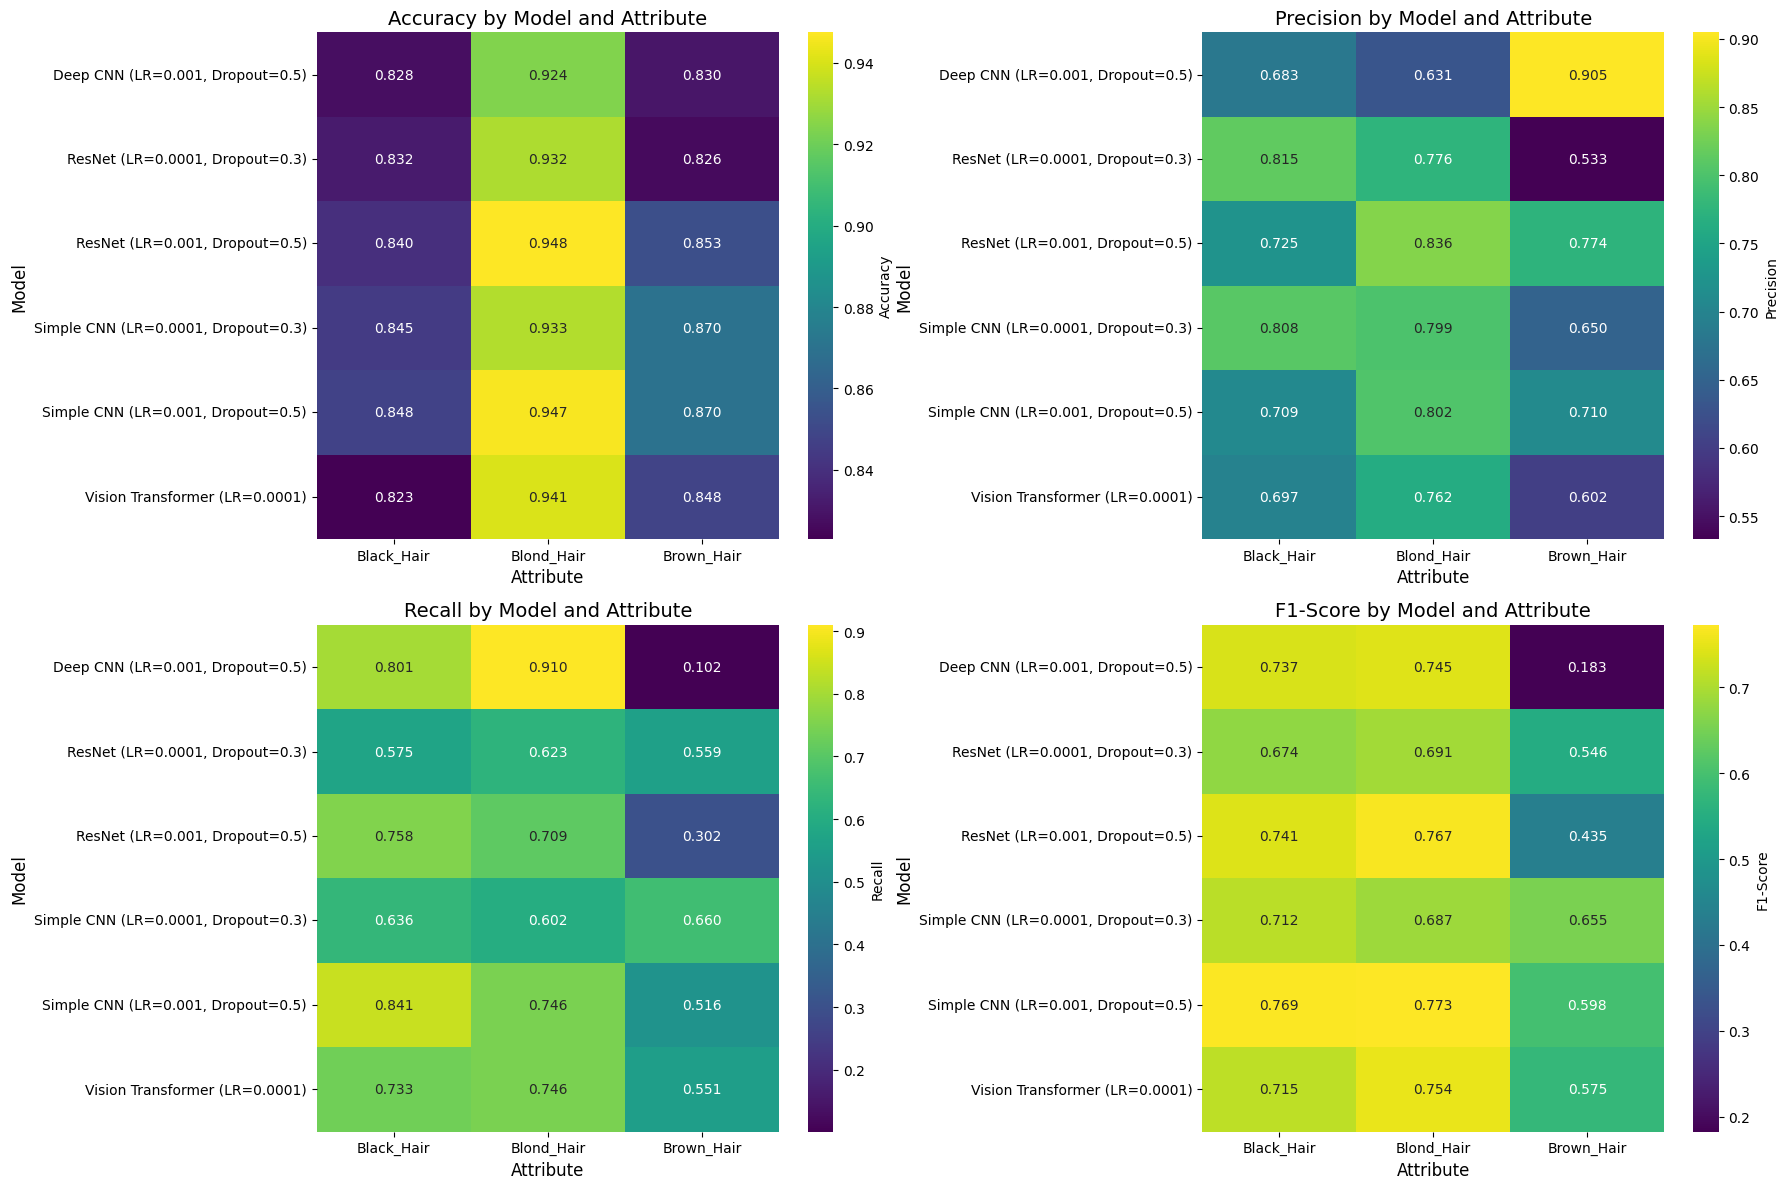

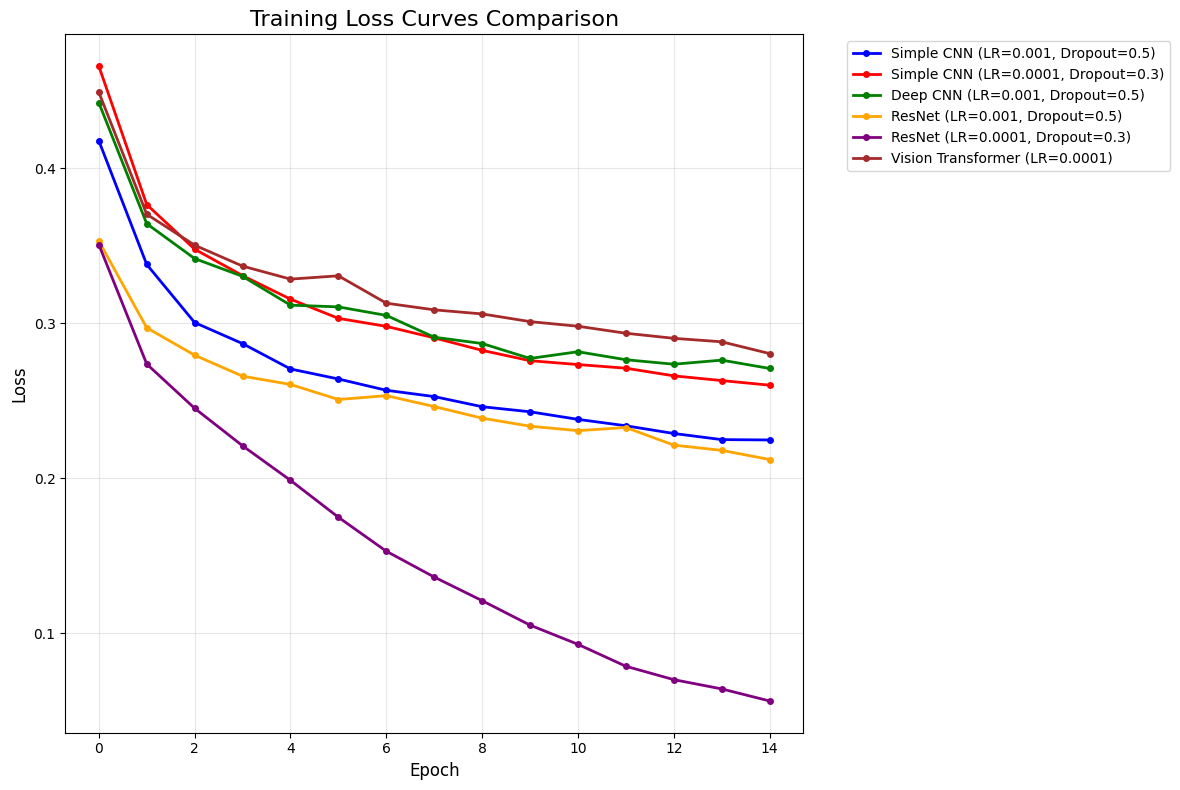


FINAL STATISTICS

aVG Performance FOR model:
                                     Accuracy  Precision  Recall  F1-Score
Model                                                                     
Deep CNN (LR=0.001, Dropout=0.5)       0.8605     0.7394  0.6043    0.5550
ResNet (LR=0.0001, Dropout=0.3)        0.8633     0.7077  0.5854    0.6368
ResNet (LR=0.001, Dropout=0.5)         0.8802     0.7781  0.5898    0.6476
Simple CNN (LR=0.0001, Dropout=0.3)    0.8825     0.7524  0.6329    0.6846
Simple CNN (LR=0.001, Dropout=0.5)     0.8880     0.7399  0.7010    0.7132
Vision Transformer (LR=0.0001)         0.8705     0.6868  0.6767    0.6812

Best Model (F1-Score): Simple CNN (LR=0.001, Dropout=0.5)
F1-Score avg: 0.7132
\Best Model (Accuracy): Simple CNN (LR=0.001, Dropout=0.5)
Accuracy avg: 0.8880

ATTRIBUTE ANALYSIS

Difficulties for attributes (per F1-Score avg):
Blond_Hair: F1=0.736, Acc=0.937
Black_Hair: F1=0.725, Acc=0.836
Brown_Hair: F1=0.499, Acc=0.849

Easier attribute: Blond_Hair

In [ ]:
# Dataset setup with torchvision
def setup_celeba_with_torchvision(data_dir='./data'):
    print("Setup dataset CelebA with torchvision")

    # Trasformations
    transform_train = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    transform_test = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    try:
        print("Download - torchvision")

        print("Training set")
        train_dataset = datasets.CelebA(
            root=data_dir,
            split='train',
            target_type='attr',
            download=True,
            transform=transform_train
        )

        print("Test set")
        test_dataset = datasets.CelebA(
            root=data_dir,
            split='test',
            target_type='attr',
            download=False,
            transform=transform_test
        )

        print(f"Training samples: {len(train_dataset)}")
        print(f"Test samples: {len(test_dataset)}")

        return train_dataset, test_dataset, CELEBA_ATTRIBUTES

    except RuntimeError as e:
        if "Failed to retrieve file url" in str(e):
            print(f"Download error: {str(e)}")
            print("Proceeding with simulated dataset.")
            return None, None, None
        else:
            print(f"Error - Download torchvision: {str(e)}")
            return None, None, None

# CelebA Dataset with selected attributes
class CelebACustomDataset(Dataset):
    def __init__(self, root_dir, attr_file, partition_file, selected_attrs,
                 split='train', transform=None, max_samples=None):
        self.root_dir = root_dir
        self.img_dir = os.path.join(root_dir, 'img_align_celeba')
        self.transform = transform
        self.selected_attrs = selected_attrs
        self.split = split

        # partitions
        self.partitions = {}
        if os.path.exists(partition_file):
            with open(partition_file, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    img_name = parts[0]
                    partition = int(parts[1])  # 0=train, 1=validation, 2=test
                    self.partitions[img_name] = partition

        # Map split into numbers
        split_map = {'train': 0, 'val': 1, 'test': 2}
        target_partition = split_map[split]

        # Attributes
        self.data = []
        if os.path.exists(attr_file):
            with open(attr_file, 'r') as f:
                lines = f.readlines()

            # First row: number of images
            # Second row: attributes name
            self.attr_names = lines[1].strip().split()

            # Index selected attributes
            self.attr_indices = [self.attr_names.index(attr) for attr in selected_attrs]

            # Parsing
            for i in range(2, len(lines)):
                parts = lines[i].strip().split()
                img_name = parts[0]

                # Check if the image is in the correct split
                if img_name in self.partitions and self.partitions[img_name] == target_partition:
                    img_path = os.path.join(self.img_dir, img_name)
                    if os.path.exists(img_path):
                        attrs = [int(x) for x in parts[1:]]
                        # Convert from [-1,1] to [0,1]
                        attrs = [(x + 1) // 2 for x in attrs]
                        selected_attr_values = [attrs[idx] for idx in self.attr_indices]

                        self.data.append((img_path, selected_attr_values))

                        if max_samples and len(self.data) >= max_samples:
                            break

        if len(self.data) == 0:
            print(f"No data for {split}.")
            self._create_simulated_data(max_samples or 1000)

    # Create simulated data if the Dataset is not available
    def _create_simulated_data(self, size):
        print(f"Creation of {size} simulated samples")
        self.data = []
        for i in range(size):
            # Simulated images (substituted in __getitem__)
            fake_path = f"fake_{i}.jpg"
            # Casual but correlated attributes
            attrs = np.random.randint(0, 2, NUM_ATTRIBUTES).tolist()
            self.data.append((fake_path, attrs))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, attrs = self.data[idx]

        # Load real image or create a simulated image
        if os.path.exists(img_path) and not img_path.startswith('fake_'):
            img = Image.open(img_path)
        else:
            # Simulated image
            img = Image.fromarray(np.random.randint(0, 255, (178, 218, 3), dtype=np.uint8))

        if self.transform:
            img = self.transform(img)

        return img, torch.tensor(attrs, dtype=torch.float32)

# MODEL DEFINITION

# Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=NUM_ATTRIBUTES, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()

        # Feature extractor: convolutions, ReLU and max pooling
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )

        # Classifier: fully connected layers with dropout
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(256 * 4 * 4, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return torch.sigmoid(x)

# Deep CNN
class DeepCNN(nn.Module):
    def __init__(self, num_classes=NUM_ATTRIBUTES, dropout_rate=0.5):
        super(DeepCNN, self).__init__()

        # Feature extractor: 4 convolutional blocks with batch normalization and max pooling
        self.features = nn.Sequential(
            # Blocco 1
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Blocco 2
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Blocco 3
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            # Blocco 4
            nn.Conv2d(256, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )

        # Classifier: Fully connected layers with dropout and ReLU
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(512 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(dropout_rate),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return torch.sigmoid(x)

# Res Net Block
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()
        # First convolution
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, padding=1)
        # Batch normalization
        self.bn1 = nn.BatchNorm2d(out_channels)
        # Second convolution
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding=1)
        #Batch normalization
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(residual)
        return F.relu(out)  # Add ReLU

# Custom Res Net
class CustomResNet(nn.Module):
    def __init__(self, num_classes=NUM_ATTRIBUTES, dropout_rate=0.5):
        super(CustomResNet, self).__init__()
        # 7x7 Kernel for feature extraction
        self.conv1 = nn.Conv2d(3, 64, 7, 2, padding=3)
        #Batch normalization
        self.bn1 = nn.BatchNorm2d(64)
        # Pooling 3x3, stride=2 -> reduce dimension
        self.maxpool = nn.MaxPool2d(3, 2, padding=1)

        # Block construction
        # Each layer consist in several ResNet blocks with different stride (down-sampling)
        self.layer1 = self._make_layer(64, 64, 2, 1)    # layer: 64-> 64, 2 blocks, stride=1
        self.layer2 = self._make_layer(64, 128, 2, 2)   # layer: 64-> 128, 2 blocks, stride=2
        self.layer3 = self._make_layer(128, 256, 2, 2)  # layer: 128-> 256, 2 blocks, stride=2
        self.layer4 = self._make_layer(256, 512, 2, 2)  # layer: 256-> 512, 2 blocks, stride=2

        # Final pooling for dimensional reduction
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        # Final classifier: fc + dropout
        self.fc = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(512, num_classes)
        )

    # Build Res Net block sequence
    def _make_layer(self, in_channels, out_channels, num_blocks, stride):
        layers = []
        layers.append(ResNetBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResNetBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # Gloobal pooling for reducing spatial dimensions
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return torch.sigmoid(x)

#Simplified Vision Transformer
class SimplifiedViT(nn.Module):
    def __init__(self, image_size=64, patch_size=8, num_classes=NUM_ATTRIBUTES,
                 dim=256, depth=6, heads=8, dropout_rate=0.1):
        super(SimplifiedViT, self).__init__()

        # Calculate patch number
        num_patches = (image_size // patch_size) ** 2   # Total patch number in the image
        patch_dim = 3 * patch_size ** 2                 # Patch dimension (RGB * patch_size)

        # Embedding parameters
        self.patch_size = patch_size
        self.patch_embedding = nn.Linear(patch_dim, dim)
        # Positional parameters: learn he position of the image patch
        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        # Class token for classification
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        self.dropout = nn.Dropout(dropout_rate)

        # Transformer Layers
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(
                d_model=dim,
                nhead=heads,
                dim_feedforward=dim * 4,
                dropout=dropout_rate,
                batch_first=True
            ) for _ in range(depth)
        ])

        self.norm = nn.LayerNorm(dim)
        self.head = nn.Linear(dim, num_classes)

    def forward(self, x):
        B, C, H, W = x.shape  # input: [batch_size, channels, height, width]

        # Patch creation (change the image in a patch sequence)
        # unfold for segmenting the image in non overlapping patch
        x = x.unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
        x = x.contiguous().view(B, -1, 3 * self.patch_size * self.patch_size)

        # Patch embedding
        x = self.patch_embedding(x)

        # Add class token
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat([cls_tokens, x], dim=1)

        # Positional embedding
        x += self.pos_embedding[:, :x.size(1)]
        x = self.dropout(x)

        # Transformer layers
        for layer in self.transformer_layers:
            x = layer(x)

        x = self.norm(x)

        # Class token for normalization
        cls_output = x[:, 0]
        return torch.sigmoid(self.head(cls_output))

# Create training and est dataset
def create_datasets(data_dir='./data'):
    print("Dataset creation")

    # Trasformation
    transform_train = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.RandomHorizontalFlip(0.5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    transform_test = transforms.Compose([
        transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # torchvision
    train_dataset, test_dataset, attr_names = setup_celeba_with_torchvision(data_dir)

    if train_dataset is not None:
        # Use torchvision dataset
        # Create a wrapper to select only color hair attributes
        class CelebAWrapper(Dataset):
            def __init__(self, dataset, selected_attrs, all_attrs):
                self.dataset = dataset
                self.attr_indices = [all_attrs.index(attr) for attr in selected_attrs]

            def __len__(self):
                return len(self.dataset)

            def __getitem__(self, idx):
                img, all_attrs = self.dataset[idx]
                selected_attrs = all_attrs[self.attr_indices].float()
                # Convert from [-1,1] to [0,1]
                return img, selected_attrs

        train_wrapped = CelebAWrapper(train_dataset, SELECTED_ATTRIBUTES, CELEBA_ATTRIBUTES)
        test_wrapped = CelebAWrapper(test_dataset, SELECTED_ATTRIBUTES, CELEBA_ATTRIBUTES)

        # Limit speed - training
        train_size = min(10000, len(train_wrapped))
        test_size = min(2000, len(test_wrapped))

        train_subset = torch.utils.data.Subset(train_wrapped, range(train_size))
        test_subset = torch.utils.data.Subset(test_wrapped, range(test_size))

        train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE,
                                shuffle=True, num_workers=2, pin_memory=True)
        test_loader = DataLoader(test_subset, batch_size=BATCH_SIZE,
                               shuffle=False, num_workers=2, pin_memory=True)

        print(f"Training samples: {len(train_subset)}")
        print(f"Test samples: {len(test_subset)}")

    else:
        print("Simulated Dataset")

        class SimulatedCelebA(Dataset):
            def __init__(self, size=1000, transform=None):
                self.size = size
                self.transform = transform

            def __len__(self):
                return self.size

            def __getitem__(self, idx):
                # Casual image
                img = Image.fromarray(np.random.randint(0, 255, (178, 218, 3), dtype=np.uint8))
                if self.transform:
                    img = self.transform(img)

                # Correlated casual attributes
                attrs = np.random.randint(0, 2, NUM_ATTRIBUTES).astype(np.float32)
                return img, torch.tensor(attrs)

        train_dataset = SimulatedCelebA(size=8000, transform=transform_train)
        test_dataset = SimulatedCelebA(size=2000, transform=transform_test)

        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE,
                                shuffle=True, num_workers=2, pin_memory=True)
        test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                               shuffle=False, num_workers=2, pin_memory=True)

        print(f"Simulated Dataset sreated!")
        print(f"Training samples: {len(train_dataset)}")
        print(f"Test samples: {len(test_dataset)}")

    return train_loader, test_loader, SELECTED_ATTRIBUTES

# Training model
def train_model(model, train_loader, criterion, optimizer, num_epochs, model_name):
    print(f"\nTraining {model_name}")
    model.train()  # Train model
    train_losses = [] # Loss at each epoch

    for epoch in range(num_epochs):
        epoch_loss = 0.0  # Total loss
        num_batches = 0 # Batch counter
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')

        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()       # Zero gradient of the optimizer before calculating new ones
            outputs = model(images)     # Predictions
            loss = criterion(outputs, labels)
            loss.backward()             # Calculate weights through backpropagation
            optimizer.step()            # Weights update

            epoch_loss += loss.item()   # Accumulate loss
            num_batches += 1

            progress_bar.set_postfix({'Loss': f'{loss.item():.4f}'})

        # Average loss for the epoch
        avg_loss = epoch_loss / num_batches
        train_losses.append(avg_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

    return train_losses

# Evaluate the model and calculate the metrics
def evaluate_model(model, test_loader, attr_names, model_name):
    print(f"\n Evaluating {model_name}")
    model.eval()

    all_predictions = []
    all_labels = []
    all_images = []

    with torch.no_grad():
        progress_bar = tqdm(test_loader, desc='Evaluation')
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)

            # Convert in binary predictions
            predictions = (outputs > 0.5).float()

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            if len(all_images) < 32:  # Save only first 32 for visualizing
                all_images.extend(images[:32-len(all_images)].cpu())

    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    # Calculate metrics for each attribute
    results = {}

    for i, attr in enumerate(attr_names):
        y_true = all_labels[:, i]
        y_pred = all_predictions[:, i]

        accuracy = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average='binary', zero_division=0
        )

        results[attr] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': confusion_matrix(y_true, y_pred)
        }

        print(f"{attr}: Acc={accuracy:.3f}, P={precision:.3f}, R={recall:.3f}, F1={f1:.3f}")

    return results, all_images[:32], all_predictions[:32], all_labels[:32]

# Plot confusion matrices
def plot_confusion_matrices(results, model_name, attr_names):
    fig, axes = plt.subplots(1, len(attr_names), figsize=(4*len(attr_names), 4))
    if len(attr_names) == 1:
        axes = [axes]

    for i, attr in enumerate(attr_names):
        cm = results[attr]['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
        axes[i].set_title(f'{attr}\nAcc: {results[attr]["accuracy"]:.3f}')
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')

    plt.suptitle(f'Confusion Matrices - {model_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize predictions
def plot_sample_predictions(images, predictions, labels, attr_names, model_name):
    fig, axes = plt.subplots(2, 8, figsize=(20, 8))

    for i in range(min(16, len(images))):
        row = i // 8
        col = i % 8

        # Denormalize image
        img = images[i].permute(1, 2, 0)
        img = (img * 0.5) + 0.5  # Denormalize from [-1,1] to [0,1]
        img = torch.clamp(img, 0, 1)

        axes[row, col].imshow(img)
        axes[row, col].axis('off')

        # Add predictions vs ground truth
        pred_text = []
        for j, attr in enumerate(attr_names):
            pred = int(predictions[i][j])
            true = int(labels[i][j])
            symbol = "V" if pred == true else "X"
            color = "green" if pred == true else "red"
            pred_text.append(f"{attr[:3]}:{pred} {symbol}")

        title_text = '\n'.join(pred_text)
        axes[row, col].set_title(title_text, fontsize=9)

    plt.suptitle(f'Sample Predictions - {model_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Results
def create_results_summary(all_results):
    summary_data = []

    for model_name, results in all_results.items():
        for attr_name, metrics in results.items():
            summary_data.append({
                'Model': model_name,
                'Attribute': attr_name,
                'Accuracy': metrics['accuracy'],
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1']
            })

    df = pd.DataFrame(summary_data)
    return df

# Model performances
def plot_model_comparison(summary_df, attr_names):
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2

        pivot_df = summary_df.pivot(index='Model', columns='Attribute', values=metric)
        sns.heatmap(pivot_df, annot=True, fmt='.3f', ax=axes[row, col],
                   cmap='viridis', cbar_kws={'label': metric})
        axes[row, col].set_title(f'{metric} by Model and Attribute', fontsize=14)
        axes[row, col].set_xlabel('Attribute', fontsize=12)
        axes[row, col].set_ylabel('Model', fontsize=12)

    plt.tight_layout()
    plt.show()

# Plot training loss curve
def plot_training_curves(all_losses, model_names):
    plt.figure(figsize=(12, 8))

    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

    for i, (model_name, losses) in enumerate(zip(model_names, all_losses)):
        plt.plot(losses, label=model_name, color=colors[i % len(colors)],
                linewidth=2, marker='o', markersize=4)

    plt.title('Training Loss Curves Comparison', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Sale
def save_detailed_results(summary_df, all_results, filename='celeba_detailed_results.txt'):
    with open(filename, 'w') as f:
        f.write("CELEBA DEEP LEARNING MODELS COMPARISON\n")
        f.write("=" * 50 + "\n\n")

        f.write("MODELS:\n")
        for i, model_name in enumerate(summary_df['Model'].unique(), 1):
            f.write(f"{i}. {model_name}\n")
        f.write(f"\nANALYZED ATTRIBUTES: {', '.join(SELECTED_ATTRIBUTES)}\n\n")

        f.write("RESULTS FOR MODEL:\n")
        f.write("=" * 40 + "\n")

        for model_name, results in all_results.items():
            f.write(f"\n{model_name}:\n")
            f.write("-" * (len(model_name) + 1) + "\n")

            for attr_name, metrics in results.items():
                f.write(f"  {attr_name}:\n")
                f.write(f"    Accuracy:  {metrics['accuracy']:.4f}\n")
                f.write(f"    Precision: {metrics['precision']:.4f}\n")
                f.write(f"    Recall:    {metrics['recall']:.4f}\n")
                f.write(f"    F1-Score:  {metrics['f1']:.4f}\n")
                f.write(f"    Confusion Matrix:\n")
                cm = metrics['confusion_matrix']
                f.write(f"      TN={cm[0,0]:4d} FP={cm[0,1]:4d}\n")
                f.write(f"      FN={cm[1,0]:4d} TP={cm[1,1]:4d}\n\n")

        # Performance agv for model
        f.write("\nAVERAGE PERFORMANCE FOR MODEL:\n")
        f.write("=" * 30 + "\n")
        avg_performance = summary_df.groupby('Model')[['Accuracy', 'F1-Score']].mean()
        for model_name in avg_performance.index:
            f.write(f"{model_name}:\n")
            f.write(f"  Accuracy avg: {avg_performance.loc[model_name, 'Accuracy']:.4f}\n")
            f.write(f"  F1-Score avg: {avg_performance.loc[model_name, 'F1-Score']:.4f}\n\n")

        # Best model
        best_model = avg_performance['F1-Score'].idxmax()
        f.write(f"BEST MODEL (F1-Score): {best_model}\n")
        f.write(f"F1-Score avg: {avg_performance.loc[best_model, 'F1-Score']:.4f}\n")

def main():
    print("CELEBA DEEP LEARNING MODELS COMPARISON")
    print(f"Device: {device}")
    print(f"Batch size: {BATCH_SIZE}")
    print(f"Epochs: {NUM_EPOCHS}")
    print(f"Selected attributes: {SELECTED_ATTRIBUTES}")

    # Create Dataset
    print("\n1. Setup Dataset CelebA...")
    train_loader, test_loader, attr_names = create_datasets()

    if train_loader is None or len(next(iter(train_loader))[0]) == 0:
        print("ERROR: Impossibile Dataset loading")
        return

    print(f"Dataset cloades")
    print(f"Selected attributes: {attr_names}")

    # Define model
    model_configs = {
        'Simple CNN (LR=0.001, Dropout=0.5)': {
            'model': SimpleCNN(dropout_rate=0.5),
            'lr': 0.001,
            'weight_decay': 1e-4
        },
        'Simple CNN (LR=0.0001, Dropout=0.3)': {
            'model': SimpleCNN(dropout_rate=0.3),
            'lr': 0.0001,
            'weight_decay': 1e-5
        },
        'Deep CNN (LR=0.001, Dropout=0.5)': {
            'model': DeepCNN(dropout_rate=0.5),
            'lr': 0.001,
            'weight_decay': 1e-4
        },
        'ResNet (LR=0.001, Dropout=0.5)': {
            'model': CustomResNet(dropout_rate=0.5),
            'lr': 0.001,
            'weight_decay': 1e-4
        },
        'ResNet (LR=0.0001, Dropout=0.3)': {
            'model': CustomResNet(dropout_rate=0.3),
            'lr': 0.0001,
            'weight_decay': 1e-5
        },
        'Vision Transformer (LR=0.0001)': {
            'model': SimplifiedViT(dropout_rate=0.1),
            'lr': 0.0001,
            'weight_decay': 1e-4
        }
    }

    print(f"\n2. Training and evaluation of {len(model_configs)} models")

    # Training models
    all_results = {}
    all_losses = []
    model_names = list(model_configs.keys())
    criterion = nn.BCELoss()

    for i, (model_name, config) in enumerate(model_configs.items()):
        print(f"\n{'='*60}")
        print(f"[{i+1}/{len(model_configs)}] Processing: {model_name}")
        print(f"{'='*60}")

        model = config['model'].to(device)
        optimizer = optim.Adam(
            model.parameters(),
            lr=config['lr'],
            weight_decay=config.get('weight_decay', 0)
        )

        # Training
        train_losses = train_model(
            model, train_loader, criterion, optimizer,
            NUM_EPOCHS, model_name
        )
        all_losses.append(train_losses)

        # Evaluation
        results, sample_images, sample_preds, sample_labels = evaluate_model(
            model, test_loader, attr_names, model_name
        )

        all_results[model_name] = results

        # Visualization
        print(f"\n3. Visualization for {model_name}...")
        plot_confusion_matrices(results, model_name, attr_names)
        plot_sample_predictions(
            sample_images, sample_preds, sample_labels,
            attr_names, model_name
        )

    print(f"\n{'='*60}")
    print("4. FINAL COMPARATIVE ANALYSIS")
    print(f"{'='*60}")

    # Summary
    summary_df = create_results_summary(all_results)
    print("\nSummary:")
    print(summary_df.round(4))

    # Save results
    summary_df.to_csv('celeba_results_summary.csv', index=False)
    save_detailed_results(summary_df, all_results)
    print("\nRisults saved in:")
    print("- celeba_results_summary.csv")
    print("- celeba_detailed_results.txt")

    # Comparative graphs
    print("\n5. COMPARATIVE GRAPHS")
    plot_model_comparison(summary_df, attr_names)
    plot_training_curves(all_losses, model_names)

    # Finalstatistics
    print("\nFINAL STATISTICS")
    avg_performance = summary_df.groupby('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean()
    print("\naVG Performance FOR model:")
    print(avg_performance.round(4))

    best_model_f1 = avg_performance['F1-Score'].idxmax()
    best_model_acc = avg_performance['Accuracy'].idxmax()

    print(f"\nBest Model (F1-Score): {best_model_f1}")
    print(f"F1-Score avg: {avg_performance.loc[best_model_f1, 'F1-Score']:.4f}")

    print(f"\Best Model (Accuracy): {best_model_acc}")
    print(f"Accuracy avg: {avg_performance.loc[best_model_acc, 'Accuracy']:.4f}")

    # Analysis
    print(f"\nATTRIBUTE ANALYSIS")
    attr_performance = summary_df.groupby('Attribute')[['Accuracy', 'F1-Score']].mean()
    print("\nDifficulties for attributes (per F1-Score avg):")
    attr_sorted = attr_performance.sort_values('F1-Score', ascending=False)
    for attr in attr_sorted.index:
        print(f"{attr}: F1={attr_sorted.loc[attr, 'F1-Score']:.3f}, Acc={attr_sorted.loc[attr, 'Accuracy']:.3f}")

    print(f"\nEasier attribute: {attr_sorted.index[0]}")
    print(f"\n More difficult attribute: {attr_sorted.index[-1]}")

    print(f"\n{'='*60}")
    print(f"{'='*60}")

if __name__ == "__main__":
    try:
        import torch
        import torchvision
        import matplotlib.pyplot as plt
        import seaborn as sns
        import sklearn
        import pandas as pd
        from PIL import Image
        from tqdm import tqdm
        print("All dependencies are available.")
        print(f"PyTorch version: {torch.__version__}")
        print(f"Torchvision version: {torchvision.__version__}")
    except ImportError as e:
        print(f"Missing dependency: {e}")
        exit(1)

    main()